<font color="orange">

# Table of Contents

<font color="orange">

## Setup
Import TensorFlow and other necessary libraries: </font>

In [9]:
import tensorflow  as tf
import pathlib
import os
import PIL
import PIL.Image
import matplotlib.pyplot as plt
from house_room_classifier.data.preprocessing import load_datasets
from house_room_classifier.utils.visualization_data import visualize_first_images
from PIL import Image

<font color="orange">

## Defining the Train, Validation and Test Datasets

In [10]:
DATA_DIR="data"     # Root directory where all datasets are stored
train_ds_dir=pathlib.Path(os.path.join(DATA_DIR,"train"))  # Subfolders: "train", "valid", and "test" and pathlib.Path converts
val_ds_dir=pathlib.Path(os.path.join(DATA_DIR,"valid"))    # these directory paths into Path objects, which allow easy file and folder manipulations
test_ds_dir=pathlib.Path(os.path.join(DATA_DIR,"test"))

<font color="orange">

## Defining the Train, Validation and Test Datasets

In [12]:
# Training set
image_count=len(list(train_ds_dir.glob('*/*.jpg')))          # Counts all images in the training set
print(f"Total number of images on training: {image_count}")

baths_count=len(list(train_ds_dir.glob("Bathroom/*")))       # Counts bathroom images in the training set
print(f"Total number of Bathrooms on training : {baths_count}")

# Validation set
image_count=len(list(val_ds_dir.glob('*/*.jpg')))            # Counts all images in the validation set
print(f"Total number of images on validation: {image_count}")

baths_count=len(list(val_ds_dir.glob("Bathroom/*")))         # Counts bathroom images in the validation set
print(f"Total number of Bathrooms on validation : {baths_count}")

# Test set
image_count=len(list(test_ds_dir.glob('*/*.jpg')))           # Counts all images in the test set
print(f"Total number of images on test: {image_count}")

baths_count=len(list(test_ds_dir.glob("Bathroom/*")))        # Counts bathroom images in the test set
print(f"Total number of Bathrooms on test : {baths_count}")

Total number of images on training: 3633
Total number of Bathrooms on training : 406
Total number of images on validation: 1036
Total number of Bathrooms on validation : 133
Total number of images on test: 523
Total number of Bathrooms on test : 60


In [8]:
%matplotlib inline

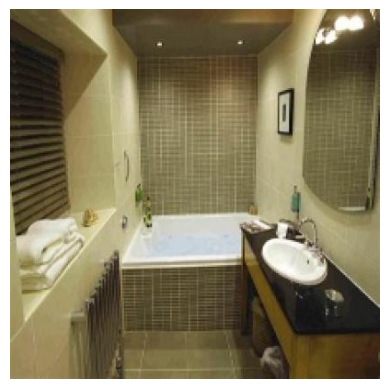

In [ ]:
%matplotlib notebook

# bath_rooms=list(val_ds_dir.glob("Bathroom/*"))
# image=PIL.Image.open(str(bath_rooms[0]))
# image.show()

# Ensure plots are displayed inline
%matplotlib inline

# Load the image
bath_rooms = list(val_ds_dir.glob("Bathroom/*"))
image = Image.open(str(bath_rooms[0]))

# Display the image inline using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide the axes for better display
plt.show()


In [15]:
  train_ds, val_ds,test_ds=load_datasets(
        train_ds_dir,
        val_dir=val_ds_dir,
        test_dir=test_ds_dir,
        img_height=150,
        img_width=150,
        batch_size=20,
        seed=123
    )

Found 3633 files belonging to 5 classes.
Found 1036 files belonging to 5 classes.
Found 523 files belonging to 5 classes.


Batch shape: (20, 150, 150, 3), Labels shape: (20,)


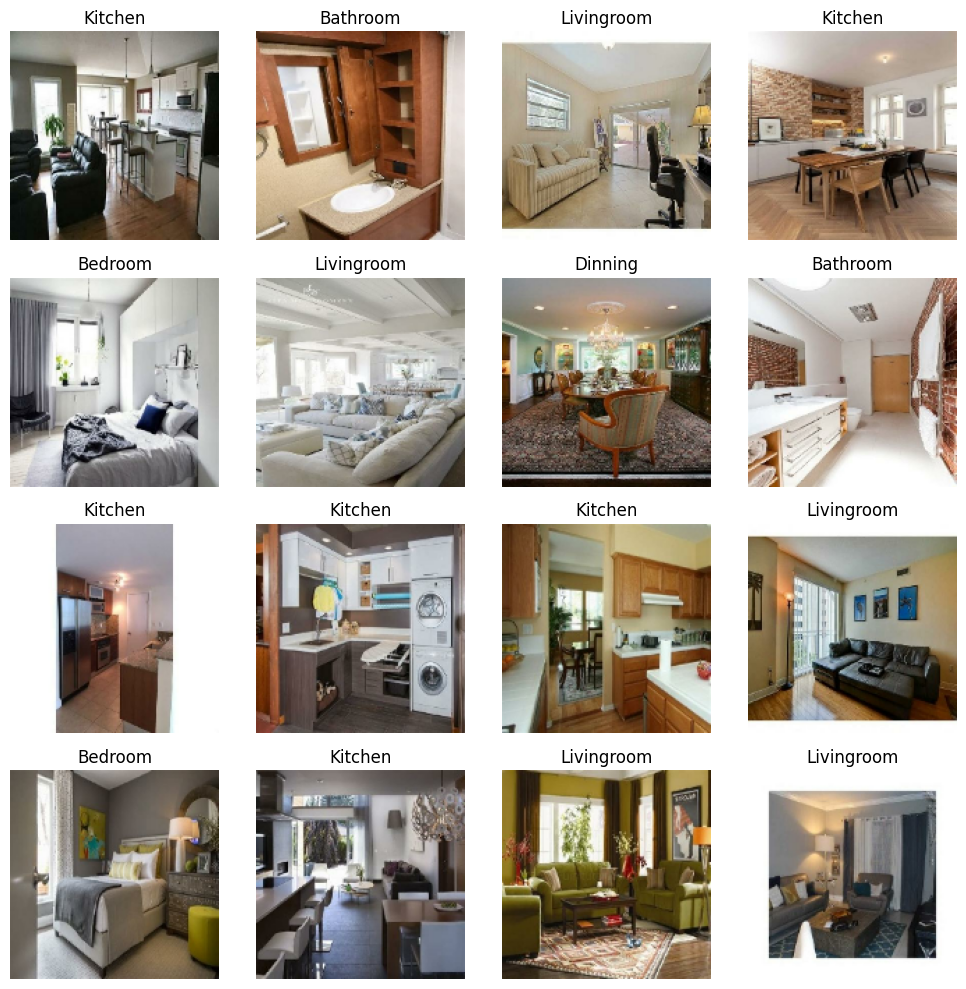

In [16]:
visualize_first_images(train_ds, class_names=train_ds.class_names,num_images=16)

In [17]:
from house_room_classifier.data.preprocessing import apply_augmentations

In [18]:
apply_augmentations(image, data_augmentation)

NameError: name 'data_augmentation' is not defined

In [23]:
from house_room_classifier.models.model_architectures import ModelArchitectures

In [25]:
data_aug_1 = ModelArchitectures.get_augmentation_strategy("custom_cnn_simple_v1")

In [32]:
# train_augmented = apply_augmentations(train_ds[:3], data_aug_1)
train_augmented = apply_augmentations(train_ds[0,:,:], data_aug_1)

TypeError: '_PrefetchDataset' object is not subscriptable

Batch shape: (20, 150, 150, 3), Labels shape: (20,)


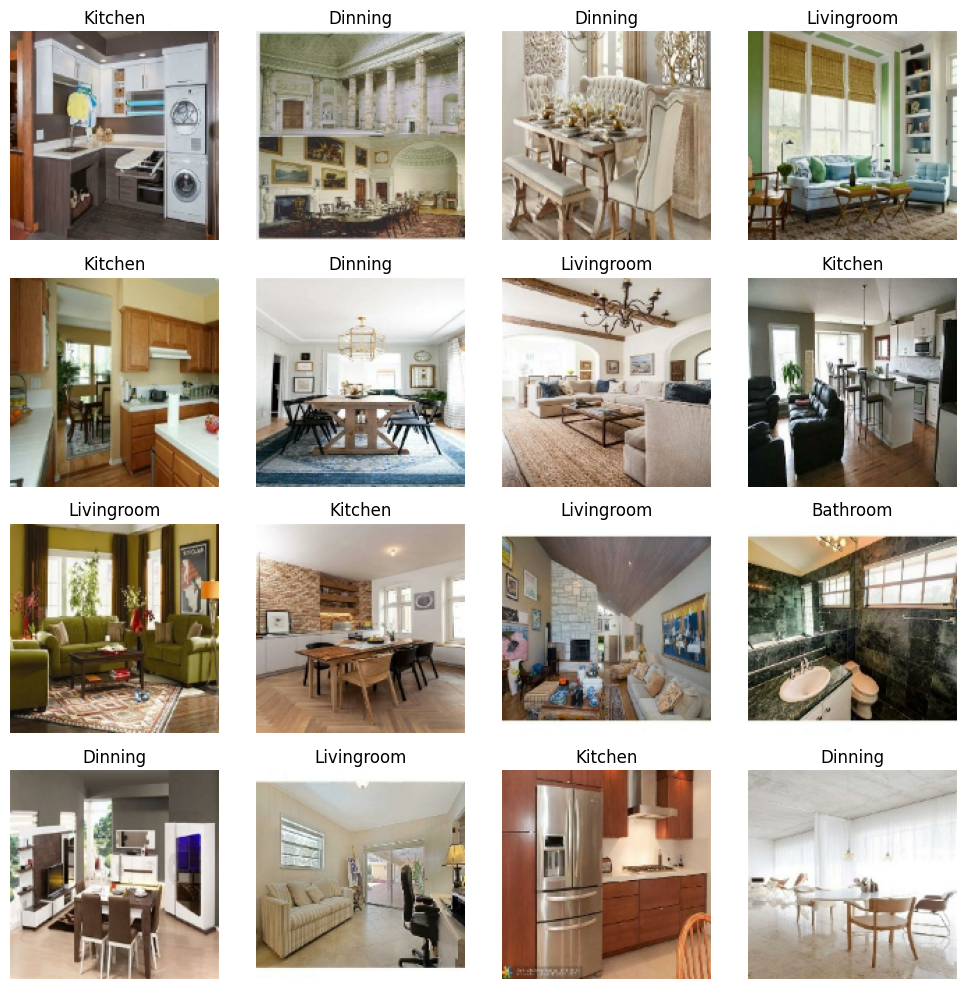

In [29]:
visualize_first_images(train_ds, class_names=train_ds.class_names,num_images=16)

Batch shape: (20, 150, 150, 3), Labels shape: (20,)


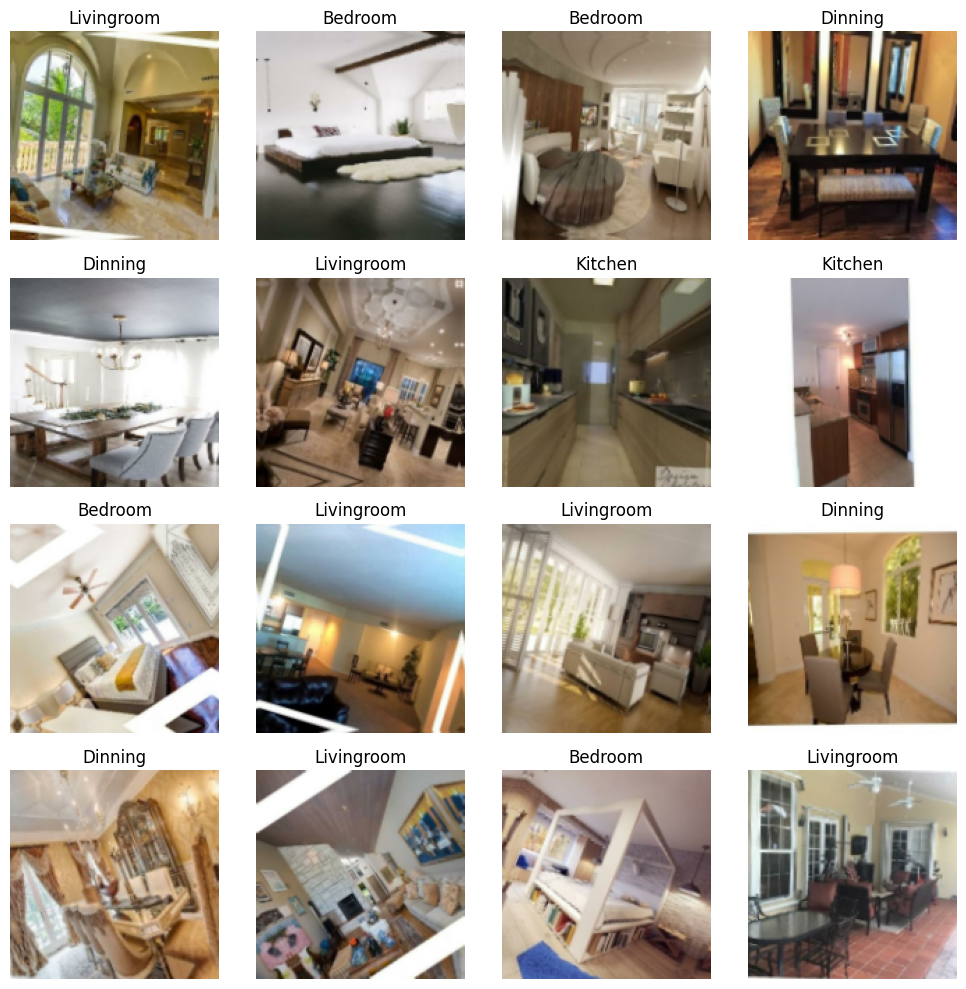

In [30]:
visualize_first_images(train_augmented, class_names=train_ds.class_names,num_images=16)

In [34]:
from house_room_classifier.models.model_architectures import get_augmentation_strategy

ImportError: cannot import name 'get_augmentation_strategy' from 'house_room_classifier.models.model_architectures' (C:\Users\baran\Documents\GitHub\house_room_classifier\house_room_classifier\models\model_architectures.py)

In [41]:
from house_room_classifier.data.preprocessing import apply_augmentations_image, apply_augmentations_multiple_times

In [36]:
%load_ext autoreload
%autoreload 2


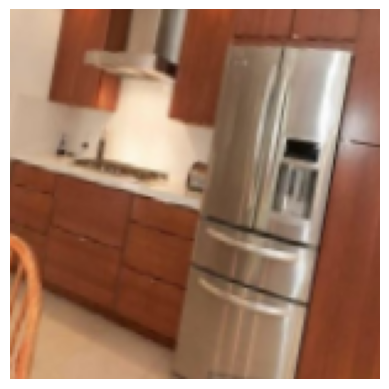

In [40]:
image, label = next(iter(train_ds))
first_image = image[0]

# Define augmentation strategy
data_aug_1 = ModelArchitectures.get_augmentation_strategy('custom_cnn_simple_v1')

# # Apply augmentations
# def apply_augmentations(image, data_augmentation):
#     if len(image.shape) == 3:  # Assuming single image (H, W, C)
#         image = tf.expand_dims(image, axis=0)  # Simulate batch
#     augmented_image = data_augmentation(image, training=True)
#     return tf.squeeze(augmented_image, axis=0)

train_augmented = apply_augmentations_image(first_image, data_aug_1)
plt.imshow(train_augmented.numpy().astype("uint8"))
plt.axis('off')
plt.show()

In [44]:
from house_room_classifier.utils.visualization_data import visualize_first_image_augmented

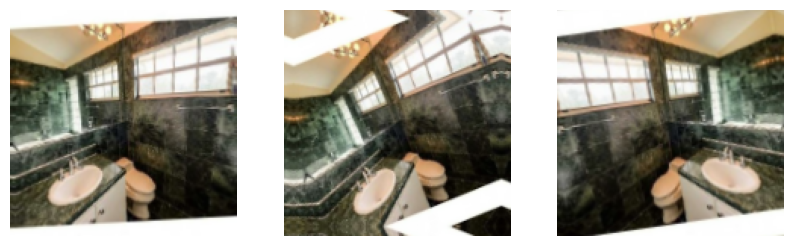

In [50]:
visualize_first_image_augmented(train_ds, data_aug_1, n_times=3)